<a href="https://colab.research.google.com/github/TJTomas/DSPS_TTomaszewski/blob/main/HW2/Homework_2_Instructions_Bayesian_posteriors_Tomaszewski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

# Worked with Alex, Zoe, and Katie

**Breakdown of work:** <br>
Zoe Beris - Data visualization, plotting parameters, labeling. <br>
Katie Moses - Postieror function concepts. <br>
Alex Bruce - Support and distributions generation. <br>
TJ - Descriptions/analysis of figures.

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [37]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


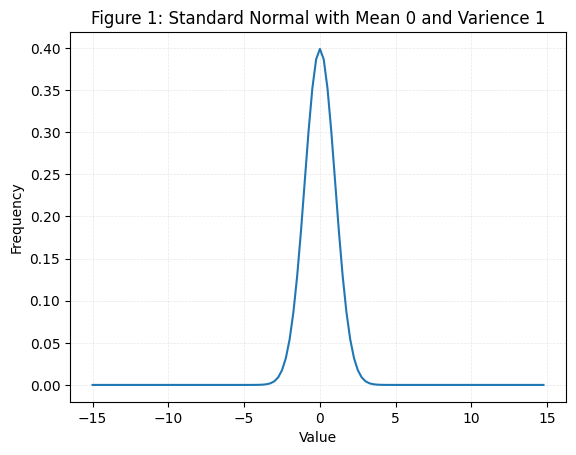

In [38]:
rng = np.random.RandomState(100)

support = np.arange(-15, 15, 0.25)
Norm_0 = stats.norm.pdf(support, loc=0, scale = (1)**(1/2))
Norm_10 = stats.norm.pdf(support, scale = (1)**(1/2), loc = 10)
tStudent_0 = stats.t.pdf(support, df = 2, loc = 0)
tStudent_10 = stats.t.pdf(support, df = 2, loc = 10)

plt.plot(support, Norm_0)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Figure 1: Standard Normal with Mean 0 and Varience 1")
plt.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
plt.show()


**Figure 1:** Here we used the pdf function to plot a standard normal distribution with a support of -15 to 15 with intervals of 0.25. Here we also plot our funciton with a mean of 0 and a varience of 1.

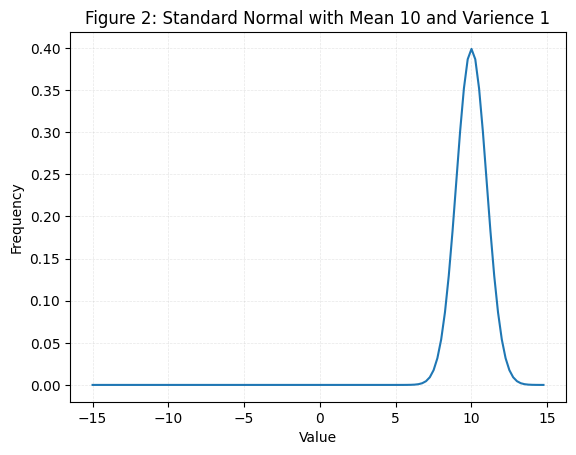

In [39]:
plt.plot(support, Norm_10)
plt.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Figure 2: Standard Normal with Mean 10 and Varience 1")
plt.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
plt.show()

**Figure 2:** Figure 2: A standard normal plot using the pdf function and the same support outlined above. Our mean is 10 and our variance is 1.

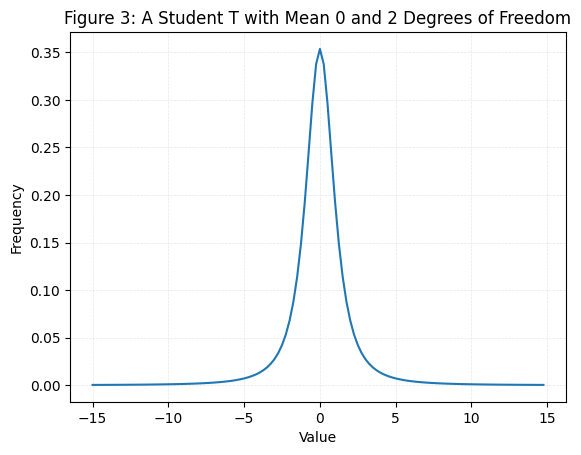

In [40]:
plt.plot(support, tStudent_0)
plt.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Figure 3: A Student T with Mean 0 and 2 Degrees of Freedom")
plt.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
plt.show()

**Figure 3:** Here we create a Student T plot using t.pmf. We use the same support as outlined in figure 1. Our mean is 0 and we have 2 degrees of freedom.

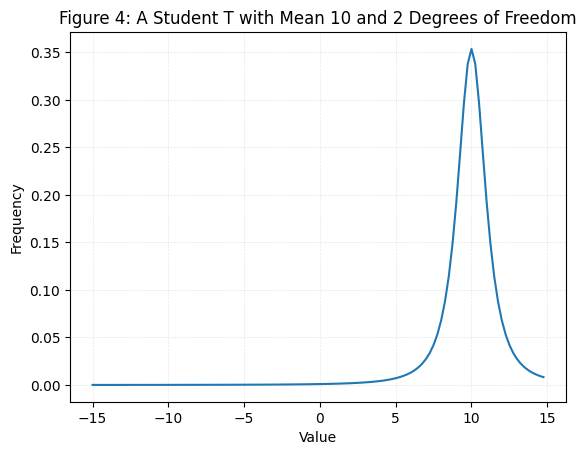

In [41]:
plt.plot(support, tStudent_10)
plt.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Figure 4: A Student T with Mean 10 and 2 Degrees of Freedom")
plt.show()

**Figure 4:** Here we used the same t.pmf function as figure 3 and the same support as outlined in figure 1. We have a mean of 10 and 2 degrees of freedom.

In [42]:
def posterior(prior, likelihood):
  normalized_prior = prior / sum(prior)
  normalized_likelihood = likelihood / sum(likelihood)
  in_progress_normalized_post = normalized_likelihood * normalized_prior
  this_posterior = in_progress_normalized_post / sum(in_progress_normalized_post)

  plt.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
  plt.plot(support, normalized_prior, linestyle = "--", color = "black", label = "prior") # prior
  plt.plot(support, normalized_likelihood, color = "black", label = "likelihood") # likelihood
  plt.plot(support, this_posterior, color = "red", label = "postierier") # Postierier
  plt.ylabel("Probability") #all plots need axis labels!!
  plt.xlabel("Density") #all plots need axis labels!!
  plt.legend(loc='upper right')

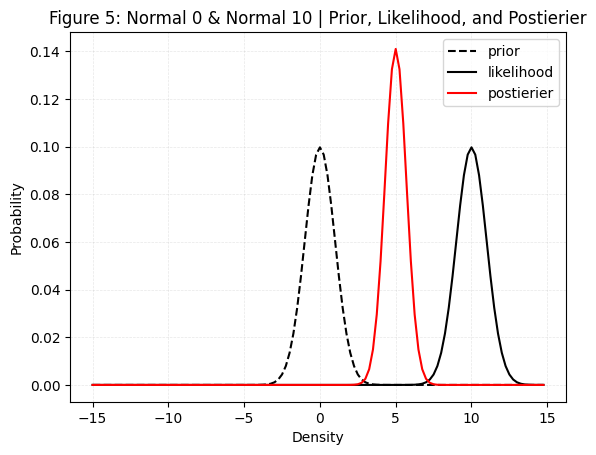

In [43]:
#function call
posterior(Norm_0, Norm_10)
plt.title("Figure 5: Normal 0 & Normal 10 | Prior, Likelihood, and Postierier")
plt.show()

**Fig 5:** In Figure 5 we use a standard normal with a mean 0 and variance 1 (norm_0), plotted with a standard normal of mean 0 and a variance 10 (norm_10). Plotted together they produce an interesting result as the prior is centered on the mean of norm_0 while the likelihood is centered on the mean of norm_10. The posterior makes sense to be centered on 5, as the mean between both of our data sets. This also is the top-left (first) plot in the tweet.

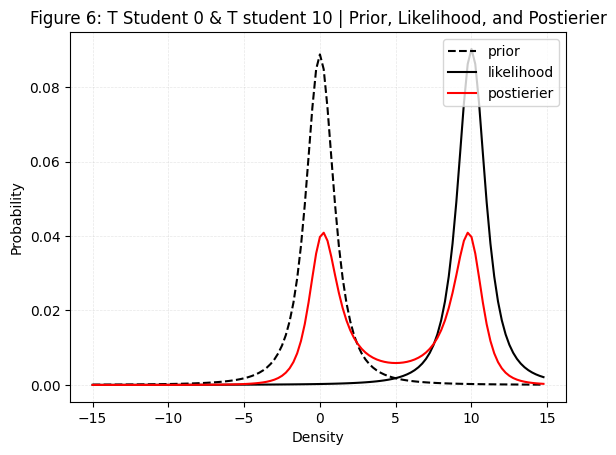

In [44]:
posterior(tStudent_0, tStudent_10)
plt.title("Figure 6: T Student 0 & T student 10 | Prior, Likelihood, and Postierier")
plt.show()

**Figure 6:** In Figure 6, we use a T Student with a mean 0 and 2 degrees of freedom (tStudent_0), plotted with a T Student of mean 10 and two degrees of freedom (tStudent_10). Plotted together they produce an interesting result as the prior and likelihood are centered just like they are on figure 1, on the function's respective means. However, there are two peaks to the posterior which makes sense since the student t function has a heavy tail, allocating more probability mass to the extreme. This is also the top-right (second) graph in the tweet.

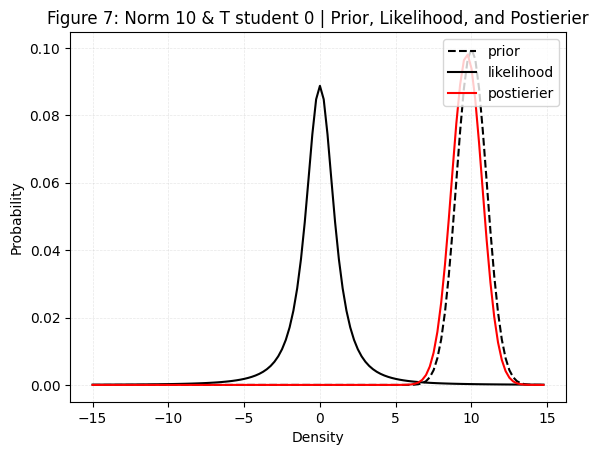

In [45]:
posterior(Norm_10, tStudent_0)
plt.title("Figure 7: Norm 10 & T student 0 | Prior, Likelihood, and Postierier")
plt.show()

**Figure 7:** Figure 7 uses Norm_10 and tStudent_0 attributes to create a plot where the likelihood is centered on the mean of tStudent_0, and the prior is centered on the mean of Norm_10. The posterior is fairly interesting, just offset to the left of the prior. This makes sense that the posterior mainly follows the trend of the normalized plots as they have larger extrema than the student plots, meaning the normalized data influences the posterior significantly more than that of the tStudent plots. This is also the bottom-right (fourth) plot on the tweet.

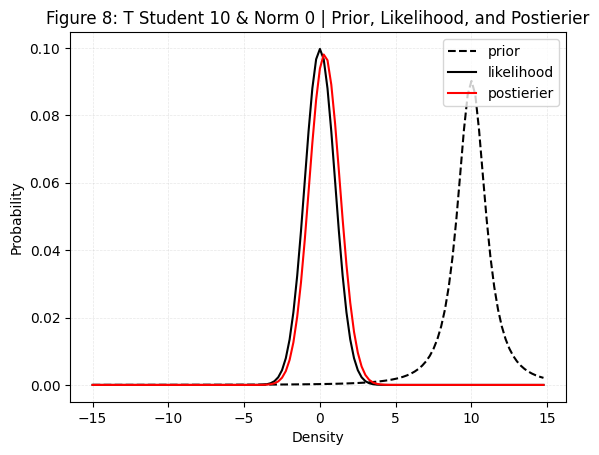

In [46]:

posterior(tStudent_10, Norm_0)
plt.title("Figure 8: T Student 10 & Norm 0 | Prior, Likelihood, and Postierier")
plt.show()

**Figure 8:** Figure 8 uses tStudent_10 and Norm_0 to generate our prior, likelihood, and posterior. Our prior is centered on the tStudent_10 mean, while our likelihood is centered on Norm_0. Our posterior is just slightly offset to the right from our likelihood for the same reason it is offset in figure 3's description. This also produces the same plot found in the bottom-left (third) graph in the tweet.